<img src="Fruits_Classification\fruits.jpg" style="height: 20rem; object-fit: cover; width: 100%;" alt ="fruit image">

<div style="text-align:center; border-radius:15px; padding:15px; color:white; margin:0; font-family: 'Orbitron', sans-serif; background: #022d49ff; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;">
  <div style="font-size:150%; color:#FEE100"><b>Fruit Classification Data Analysis</b></div>
  <div>This notebook was created by  <a href="https://www.kaggle.com/adeoyemary" style="color:#6666FF">Mary may</a></div>
</div>

## DATA INGESTION

In [3]:
# importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import seaborn as sns
from zipfile import ZipFile

In [4]:
path = r"C:\Users\user322\Desktop\Machine_Learning\Fruits_Classification\archive.zip"

In [5]:
with ZipFile(path, "r") as f:
    f.printdir()


File Name                                             Modified             Size
fruit_classification_dataset.csv               2025-10-30 15:45:34       408671


In [6]:
with ZipFile(path, "r") as f:
    with f.open("fruit_classification_dataset.csv") as file: 
        df= pd.read_csv(file)
        

In [7]:
df.head(5)

,size (cm),shape,weight (g),avg_price (₹),color,taste,fruit_name
0,25.4,round,3089.2,137.1,green,sweet,watermelon
1,24.6,round,3283.9,163.8,green,sweet,watermelon
2,7.8,round,319.0,91.3,green,sweet,custard apple
3,20.0,oval,1607.0,85.7,orange,sweet,papaya
4,10.2,long,131.5,37.8,yellow,sweet,banana


## PREMILARY DATA ANALYSIS

In [8]:
df.columns

Index(['size (cm)', 'shape', 'weight (g)', 'avg_price (₹)', 'color', 'taste',
       'fruit_name'],
      dtype='object')

In [9]:
df.shape

(10000, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   size (cm)      10000 non-null  float64
 1   shape          10000 non-null  object 
 2   weight (g)     10000 non-null  float64
 3   avg_price (₹)  10000 non-null  float64
 4   color          10000 non-null  object 
 5   taste          10000 non-null  object 
 6   fruit_name     10000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 547.0+ KB


In [11]:
df.duplicated().sum()

np.int64(246)

In [12]:
df= df.drop_duplicates()

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.shape

(9754, 7)

## EXPLORATORY DATA ANALYSIS

DESCRIPTIVE DATA ANALYSIS

In [15]:
df.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
size (cm),9754.000000,8.611195,6.372831,0.900000,4.000000,7.300000,10.200000,27.500000
weight (g),9754.000000,466.779209,737.286782,4.500000,47.600000,177.200000,375.650000,3299.800000
avg_price (₹),9754.000000,78.423621,38.324394,9.000000,49.000000,76.300000,101.700000,165.000000


In [16]:
df

,size (cm),shape,weight (g),avg_price (₹),color,taste,fruit_name
0,25.4,round,3089.2,137.1,green,sweet,watermelon
1,24.6,round,3283.9,163.8,green,sweet,watermelon
2,7.8,round,319.0,91.3,green,sweet,custard apple
3,20.0,oval,1607.0,85.7,orange,sweet,papaya
4,10.2,long,131.5,37.8,yellow,sweet,banana
...,...,...,...,...,...,...,...
9995,3.7,round,49.7,72.7,purple,tangy,plum
9996,2.8,oval,18.1,65.5,red,sweet,strawberry
9997,8.7,oval,177.7,72.2,green,sweet,pear
9998,18.0,round,1165.0,107.0,brown,sweet,coconut


In [17]:
categorical_col= df.select_dtypes(include='object').columns
categorical_col

Index(['shape', 'color', 'taste', 'fruit_name'], dtype='object')

In [18]:
from sklearn.calibration import LabelEncoder



shape = [['round', 'oval', 'long']]
df['shape']= df['shape'].str.strip()

order = LabelEncoder()

df['shape']= order.fit_transform(df[['shape']])


c:\Users\user322\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
color=[['green','red','brown','yellow','orange','pink' ,'purple','blue']] 

df['color']= df['color'].str.strip()

order = LabelEncoder()

df['color']= order.fit_transform(df[['color']])

c:\Users\user322\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
taste=[['sweet','tangy','sour']] 

df['taste']= df['taste'].str.strip()

order = LabelEncoder()

df['taste']= order.fit_transform(df[['taste']])


c:\Users\user322\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
df.head()

,size (cm),shape,weight (g),avg_price (₹),color,taste,fruit_name
0,25.4,2,3089.2,137.1,2,1,watermelon
1,24.6,2,3283.9,163.8,2,1,watermelon
2,7.8,2,319.0,91.3,2,1,custard apple
3,20.0,1,1607.0,85.7,3,1,papaya
4,10.2,0,131.5,37.8,7,1,banana


In [22]:
numerical_col= df.select_dtypes(include='number').columns
numerical_col

Index(['size (cm)', 'shape', 'weight (g)', 'avg_price (₹)', 'color', 'taste'], dtype='object')

In [23]:
for col in categorical_col:
    df[col].value_counts()
    print(df[col].value_counts())
    print("="*30)
    print()

shape
2    4796
1    4456
0     502
Name: count, dtype: int64

color
2    2029
6    1920
1    1541
7    1002
3     993
4     991
5     835
0     443
Name: count, dtype: int64

taste
1    7261
2    2012
0     481
Name: count, dtype: int64

fruit_name
pear             534
pomegranate      534
pineapple        533
custard apple    516
papaya           509
kiwi             506
coconut          502
banana           502
mango            500
watermelon       498
dragon fruit     496
lychee           495
apple            492
plum             489
orange           484
guava            481
cherry           462
blueberry        443
strawberry       432
grape            346
Name: count, dtype: int64



In [24]:
for col in numerical_col:
    df[col].value_counts()
    print(df[col].value_counts())
    print("="*30)
    print()

size (cm)
1.0     357
1.1     219
0.9     213
2.8     173
3.1     166
       ... 
23.8      6
24.9      5
27.4      5
27.5      4
25.3      4
Name: count, Length: 227, dtype: int64

shape
2    4796
1    4456
0     502
Name: count, dtype: int64

weight (g)
5.2       89
5.1       84
4.8       82
5.0       78
5.4       78
          ..
3202.0     1
1358.7     1
1519.8     1
177.0      1
319.0      1
Name: count, Length: 4168, dtype: int64

avg_price (₹)
63.8     26
37.1     25
65.4     25
64.6     23
76.8     23
         ..
161.4     1
66.3      1
144.0     1
121.6     1
162.4     1
Name: count, Length: 1355, dtype: int64

color
2    2029
6    1920
1    1541
7    1002
3     993
4     991
5     835
0     443
Name: count, dtype: int64

taste
1    7261
2    2012
0     481
Name: count, dtype: int64



## Feature Encoding

In [25]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split

# Define X and Y
X = df.drop(columns=["fruit_name"])
y = df["fruit_name"]

scaler = StandardScaler()
numerical_col = numerical_col.drop('fruit_name', errors='ignore')

X[numerical_col]= scaler.fit_transform(X[numerical_col])

# Split into train/test (if not already split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)





In [26]:
# let scale the numerical columns using minmax scaler 
from sklearn.preprocessing import MinMaxScaler


scaler= MinMaxScaler()
X[numerical_col]= scaler.fit_transform(X[numerical_col])

# let scale the numerical columns in test data too
df[numerical_col]= scaler.transform(df[numerical_col])

In [27]:
print("shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

shape of Training set :  (6827, 6)
Shape of test set :  (2927, 6)
Percentage of classes in training set:
fruit_name
pear             0.054782
pomegranate      0.054782
pineapple        0.054636
custard apple    0.052878
papaya           0.052146
kiwi             0.051853
banana           0.051414
coconut          0.051414
mango            0.051267
watermelon       0.051121
lychee           0.050828
dragon fruit     0.050828
apple            0.050388
plum             0.050095
orange           0.049656
guava            0.049363
cherry           0.047312
blueberry        0.045408
strawberry       0.044383
grape            0.035447
Name: proportion, dtype: float64
Percentage of classes in test set:
fruit_name
pineapple        0.054663
pomegranate      0.054663
pear             0.054663
custard apple    0.052955
papaya           0.052272
kiwi             0.051930
coconut          0.051589
banana           0.051589
mango            0.051247
dragon fruit     0.050905
watermelon       0.050905

In [28]:
# # initialize models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=234),
    "Random Forest": RandomForestClassifier(random_state=234),
    # "Decision Tree": DecisionTreeClassifier(random_state=234),
    # "KNN": KNeighborsClassifier()
}

Training Logistic Regression...
Logistic Regression Accuracy: 1.0
Training Random Forest...
Random Forest Accuracy: 1.0


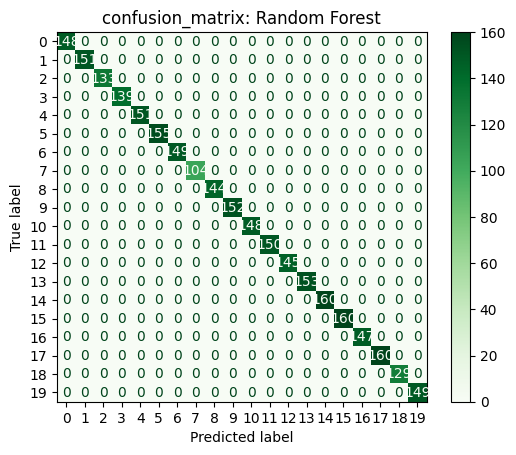

In [29]:
# Initialize a dictionary to store the models

from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


results = {}
for model_name, model in models.items():
    print(f'Training {model_name}...')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f'{model_name} Accuracy: {accuracy}')

# Include the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# plot with model name as title
disp.plot(cmap='Greens')
plt.title(f'confusion_matrix: {model_name}')
plt.show()



